### Función para obtener niveles de datos por estación RAMA: met_tmp (Temperatura)

In [1]:
from data_generator import pollutant_by_stations
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#Example of usage
start_date = "2024-05-04 00:00"
end_date = "2024-05-09 00:00"
# %% Estaciones con datos de diferentes contaminantes
all_stations = ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]

stations = ['UAX', 'MER', 'XAL','UIZ', '']

var_station = 'met_tmp'

data = pollutant_by_stations(start_date, end_date, all_stations, var_station)
print(data)

ModuleNotFoundError: No module named 'geopandas'

#### Ploteo de datos por estación

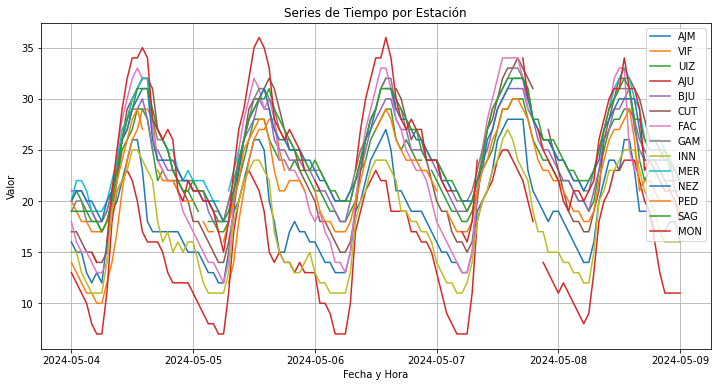

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = data #pd.DataFrame.from_dict(data, orient='index')
df.index = pd.to_datetime(df.index)

# Graficar todas las columnas del DataFrame
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Series de Tiempo por Estación')
plt.xlabel('Fecha y Hora')
plt.ylabel('Valor')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### De forma similara para contaminante cont_nox

In [14]:
from data_generator import pollutant_by_stations
#Example of usage
stations = ['UAX', 'MER', 'XAL']
pollutant = 'cont_nox'

data = pollutant_by_stations(start_date, end_date, stations, pollutant)
print(data)


                      UAX    MER
2024-05-04 00:00:00   NaN    NaN
2024-05-04 01:00:00   NaN    NaN
2024-05-04 02:00:00   NaN    NaN
2024-05-04 03:00:00   8.0   17.0
2024-05-04 04:00:00  50.0  133.0
...                   ...    ...
2024-05-08 20:00:00  89.0   84.0
2024-05-08 21:00:00  83.0   87.0
2024-05-08 22:00:00  68.0   96.0
2024-05-08 23:00:00  62.0    NaN
2024-05-09 00:00:00  86.0    NaN

[121 rows x 2 columns]


### Obtener niveles máximos diarios por estación: daily_max_pollutant_by_stations

In [15]:
# %% Estaciones con datos de diferentes contaminantes
all_stations = ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]

In [16]:
from data_generator import daily_max_pollutant_by_stations
#Example of usage

stations = ['UAX', 'MER', 'XAL']
pollutant = 'cont_otres'

data = daily_max_pollutant_by_stations(start_date, end_date, all_stations, pollutant)
print(data)


                   date station  value
0   2024-05-04 13:00:00     UIZ  114.0
1   2024-05-05 14:00:00     UIZ  123.0
2   2024-05-06 15:00:00     UIZ  121.0
3   2024-05-07 14:00:00     UIZ  132.0
4   2024-05-08 11:00:00     UIZ   90.0
..                  ...     ...    ...
158 2024-05-05 13:00:00     VIF   88.0
159 2024-05-06 14:00:00     VIF  101.0
160 2024-05-07 15:00:00     VIF   86.0
161 2024-05-08 12:00:00     VIF  107.0
162 2024-05-09 00:00:00     VIF    0.0

[163 rows x 3 columns]


### Funcionalidad para obtener fechas,valores y estaciones que sobrepasan un umbral: dates_above_threshold

In [17]:
from data_generator import pollutant_by_stations, dates_above_threshold

stations = ['UAX', 'MER', 'XAL']
pollutant = 'cont_otres'
umbral_contaminante = 130.0
df = pollutant_by_stations(start_date, end_date, all_stations, pollutant)
df_above_th = dates_above_threshold(df, umbral_contaminante)
print(df_above_th)

                       UIZ  VIF  ATI    BJU    CAM    CCA    CUA  CUT  FAC  \
2024-05-04 13:00:00    NaN  NaN  NaN    NaN  134.0    NaN    NaN  NaN  NaN   
2024-05-04 14:00:00    NaN  NaN  NaN  135.0  147.0    NaN  130.0  NaN  NaN   
2024-05-04 15:00:00    NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   
2024-05-05 12:00:00    NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   
2024-05-05 13:00:00    NaN  NaN  NaN    NaN    NaN  130.0    NaN  NaN  NaN   
2024-05-05 14:00:00    NaN  NaN  NaN  131.0    NaN    NaN    NaN  NaN  NaN   
2024-05-06 14:00:00    NaN  NaN  NaN  140.0  142.0  144.0    NaN  NaN  NaN   
2024-05-06 15:00:00    NaN  NaN  NaN  153.0  133.0  156.0    NaN  NaN  NaN   
2024-05-07 12:00:00    NaN  NaN  NaN  138.0    NaN  131.0    NaN  NaN  NaN   
2024-05-07 13:00:00    NaN  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   
2024-05-07 14:00:00  132.0  NaN  NaN    NaN    NaN    NaN    NaN  NaN  NaN   
2024-05-07 15:00:00    NaN  NaN  NaN    NaN    NaN    NaN    NaN

### Función para obtener valores promedio del WRF
Valores promediados sobre el grid de variables del modelo WRF: average_meteo

#### Temperatura promedio WRF

In [18]:
#Example of usage
from data_generator import average_meteo

#start_date = "2023-05-23 10:00"
hours = 300
field = 'T2'  
average_values = average_meteo(start_date, hours, field)
print(average_values) # substracting 273  in this case for an approx. in deg C.


2024-05-04 06:00:00    289.340187
2024-05-04 07:00:00    288.759836
2024-05-04 08:00:00    288.091831
2024-05-04 09:00:00    287.538872
2024-05-04 10:00:00    287.029402
                          ...    
2024-05-16 13:00:00    288.205988
2024-05-16 14:00:00    291.098616
2024-05-16 15:00:00    292.951725
2024-05-16 16:00:00    294.547712
2024-05-16 17:00:00    295.895905
Freq: H, Length: 300, dtype: float64


#### Variables de viento de WRF calculadas a través de U10 y V10 de WRF
ver función average_meteo()

In [20]:
hours = 48
field = 'WIND' 

if field == 'WIND':
    wsp_average, wdr_average = average_meteo(start_date, hours, field)
    print("Wind Speed Average:\n", wsp_average)
    print("Wind Direction Average:\n", wdr_average)
else:
    average_values = average_meteo(start_date, hours, field)
    print(average_values)


Wind Speed Average:
 2024-05-04 06:00:00    3.433776
2024-05-04 07:00:00    2.804112
2024-05-04 08:00:00    2.771759
2024-05-04 09:00:00    2.674381
2024-05-04 10:00:00    2.670948
2024-05-04 11:00:00    2.664914
2024-05-04 12:00:00    2.770628
2024-05-04 13:00:00    2.349870
2024-05-04 14:00:00    1.793168
2024-05-04 15:00:00    1.860097
2024-05-04 16:00:00    1.910769
2024-05-04 17:00:00    2.143409
2024-05-04 18:00:00    2.155385
2024-05-04 19:00:00    2.430819
2024-05-04 20:00:00    2.876831
2024-05-04 21:00:00    3.057387
2024-05-04 22:00:00    3.099763
2024-05-04 23:00:00    3.299589
2024-05-05 00:00:00    3.274928
2024-05-05 01:00:00    3.014042
2024-05-05 02:00:00    4.259668
2024-05-05 03:00:00    4.304666
2024-05-05 04:00:00    3.441911
2024-05-05 05:00:00    3.304187
2024-05-05 06:00:00    3.234376
2024-05-05 07:00:00    3.598541
2024-05-05 08:00:00    3.583201
2024-05-05 09:00:00    2.950191
2024-05-05 10:00:00    2.990657
2024-05-05 11:00:00    2.788980
2024-05-05 12:00:00

## Ejemplo para comparar Temperatura en estaciones vs Temperatura en WRF

In [77]:
start_date = "2024-01-01 00:00"
end_date = "2024-01-11 00:00"
# 10 días, 240 horas.
# %% Estaciones con datos de diferentes contaminantes
all_stations = ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]


### Temperatura en estaciones

In [78]:
var_station = 'met_tmp'

data = pollutant_by_stations(start_date, end_date, all_stations, var_station)
print(data)

                      TAH   CUA  AJU   CUT   FAC  AJM   INN   MER   MPA   NEZ  \
2024-01-01 00:00:00   9.0  11.0  1.0   8.0   8.0  6.0   7.0  14.0   7.0  13.0   
2024-01-01 01:00:00   9.0  10.0  1.0   7.0   7.0  5.0   6.0  13.0   8.0  13.0   
2024-01-01 02:00:00   7.0  10.0  1.0   6.0   5.0  4.0   5.0  12.0   NaN  12.0   
2024-01-01 03:00:00   7.0   9.0  1.0   6.0   4.0  4.0   5.0  12.0   7.0  11.0   
2024-01-01 04:00:00   7.0   9.0  1.0   5.0   4.0  3.0   5.0  11.0   7.0  10.0   
...                   ...   ...  ...   ...   ...  ...   ...   ...   ...   ...   
2024-01-10 20:00:00  14.0  13.0  6.0  13.0  13.0  NaN  10.0  19.0  10.0  17.0   
2024-01-10 21:00:00  13.0  12.0  4.0  11.0  12.0  NaN  10.0  18.0   9.0  16.0   
2024-01-10 22:00:00  12.0  13.0  3.0  10.0  11.0  NaN   9.0  17.0   8.0  16.0   
2024-01-10 23:00:00  11.0  12.0  2.0   9.0   8.0  NaN   8.0  16.0   8.0  15.0   
2024-01-11 00:00:00  10.0  12.0  1.0   8.0   7.0  NaN   8.0  15.0   9.0  15.0   

                      PED  

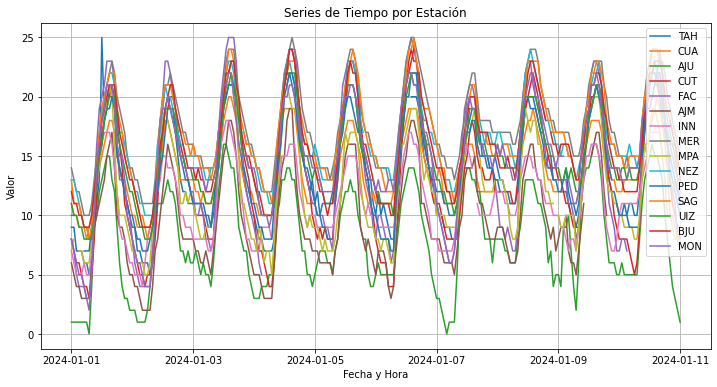

In [79]:
df = data #pd.DataFrame.from_dict(data, orient='index')
df.index = pd.to_datetime(df.index)

# Graficar todas las columnas del DataFrame
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Series de Tiempo por Estación')
plt.xlabel('Fecha y Hora')
plt.ylabel('Valor')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### Temperatura en WRF

In [80]:
from data_generator import average_meteo

hours = 240 #240 horas de 10 días a considerar partir de start date
field = 'T2'  
average_values = average_meteo(start_date, hours, field) #obteniendo datos de archivos .nc
average_values = average_values - 273.15

# Restar 6 horas a los índices del Series average_values para que se empalme con hora CDMX
average_values.index = average_values.index - pd.Timedelta(hours=6)

print(average_values) # substracting 273  in this case for an approx. in deg C.

2024-01-01 00:00:00     7.888891
2024-01-01 01:00:00     7.492145
2024-01-01 02:00:00     7.122703
2024-01-01 03:00:00     6.749477
2024-01-01 04:00:00     6.436412
                         ...    
2024-01-10 19:00:00    12.312685
2024-01-10 20:00:00    11.278797
2024-01-10 21:00:00    10.570552
2024-01-10 22:00:00     9.912382
2024-01-10 23:00:00     9.299842
Freq: H, Length: 240, dtype: float64


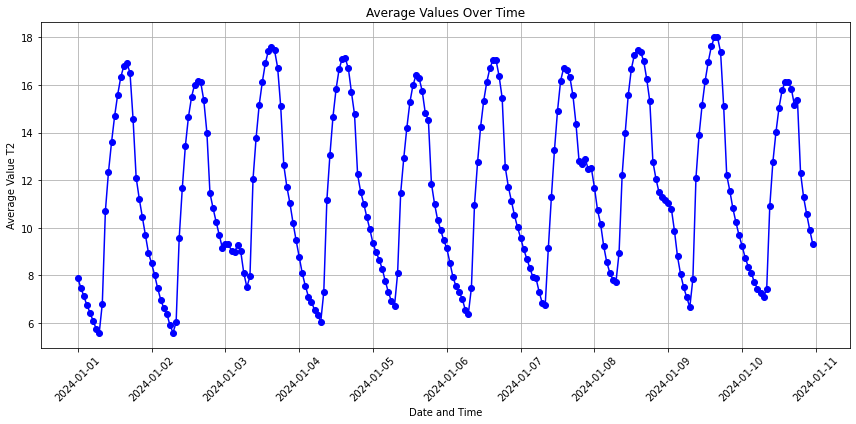

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(average_values.index, average_values.values, marker='o', linestyle='-', color='b')

# títulos y etiquetas
plt.title('Average Values Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Average Value T2')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Las dos series de datos sobrepuestas promedio grid WRF, y medidos por diferentes estaciones

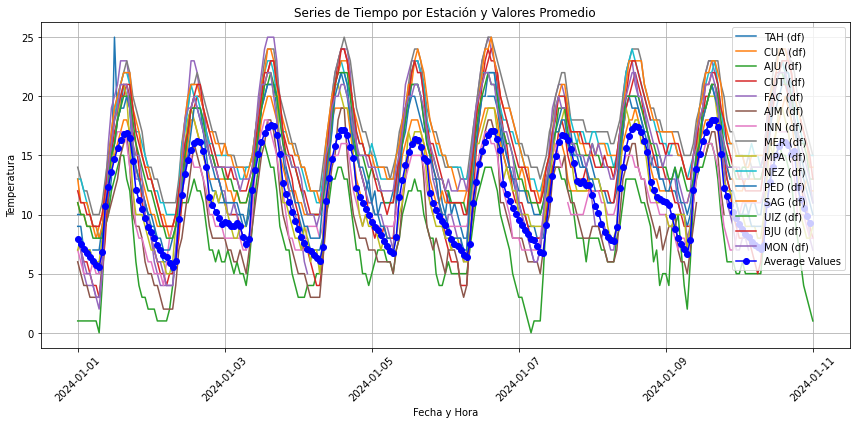

In [82]:
plt.figure(figsize=(12, 6))

# Graficar las columnas de data 
for column in data.columns:
    plt.plot(df.index, df[column], label=f'{column} (df)')

# Graficar la Series average_values
plt.plot(average_values.index, average_values.values, label='Average Values', linestyle='-', color='b', marker='o')

# Añadir títulos y etiquetas
plt.title('Series de Tiempo por Estación y Valores Promedio')
plt.xlabel('Fecha y Hora')
plt.ylabel('Temperatura')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


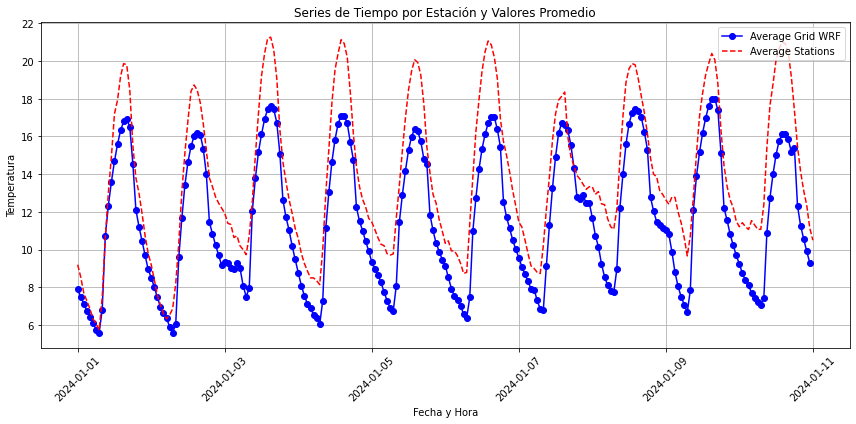

In [87]:
# Comparación de promedios
df_average = df.mean(axis=1)

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar la serie average_values
plt.plot(average_values.index, average_values.values, label='Average Grid WRF', linestyle='-', color='b', marker='o')

# Graficar la serie df_average
plt.plot(df_average.index, df_average.values, label='Average Stations', linestyle='--', color='r')

# Añadir títulos y etiquetas
plt.title('Series de Tiempo por Estación y Valores Promedio')
plt.xlabel('Fecha y Hora')
plt.ylabel('Temperatura')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Ejemplo para comparar Viento medido en estaciones vs  WRF

In [97]:
start_date = "2024-01-01 00:00"
end_date = "2024-01-11 00:00"
# 10 días, 240 horas.
# %% Estaciones con datos de diferentes contaminantes
all_stations = ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]

#### Variables en estaciones

In [98]:
# Speed
var_station = 'met_wsp'
data_wsp = pollutant_by_stations(start_date, end_date, all_stations, var_station)

#Direction 0-360 deg
var_station = 'met_wdr'
data_wdr = pollutant_by_stations(start_date, end_date, all_stations, var_station)

print(data_wsp)
print(data_wdr)

                     UIZ  VIF  AJM  MER  INN  FAC  CUT  CUA  MON  BJU  AJU  \
2024-01-01 00:00:00  1.1  0.5  3.5  0.7  1.3  0.5  0.9  0.9  0.9  0.8  0.9   
2024-01-01 01:00:00  1.2  0.8  3.6  0.5  0.6  0.9  1.3  1.6  0.7  0.9  2.1   
2024-01-01 02:00:00  NaN  NaN  3.9  NaN  0.8  1.2  1.4  1.5  0.9  0.8  2.2   
2024-01-01 03:00:00  0.8  NaN  3.7  0.7  NaN  1.4  1.3  1.3  1.1  1.0  1.7   
2024-01-01 04:00:00  1.1  0.6  3.2  0.9  1.0  1.3  1.0  1.8  0.5  NaN  2.0   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2024-01-10 20:00:00  1.4  1.3  NaN  1.7  1.8  1.7  NaN  1.9  4.5  5.0  2.1   
2024-01-10 21:00:00  2.0  1.1  NaN  2.7  2.3  1.3  NaN  1.6  3.8  4.8  2.2   
2024-01-10 22:00:00  1.7  0.6  NaN  1.7  1.7  NaN  NaN  2.1  3.4  3.8  2.2   
2024-01-10 23:00:00  1.0  0.9  NaN  1.3  1.6  1.1  NaN  1.3  3.0  2.9  2.4   
2024-01-11 00:00:00  1.3  1.4  NaN  1.2  NaN  1.3  NaN  0.8  0.9  1.7  2.5   

                     TAH  SAG  NEZ  MGH  MPA  PED  
2024-01-01 

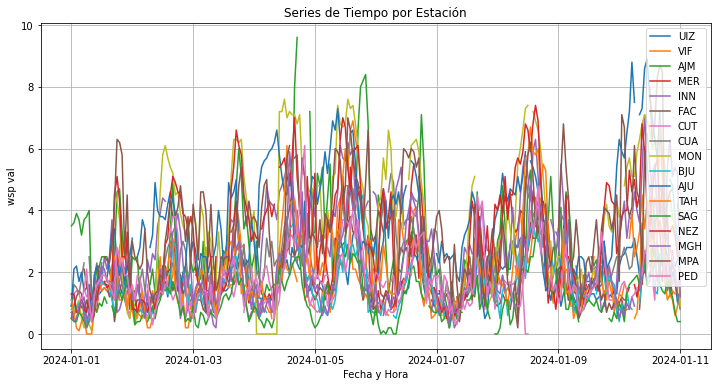

In [99]:
#data_wsp #pd.DataFrame.from_dict(data, orient='index')
data_wsp.index = pd.to_datetime(data_wsp.index)

# Graficar todas las columnas del DataFrame
plt.figure(figsize=(12, 6))
for column in data_wsp.columns:
    plt.plot(data_wsp.index, data_wsp[column], label=column)

plt.title('Series de Tiempo por Estación')
plt.xlabel('Fecha y Hora')
plt.ylabel('wsp val')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


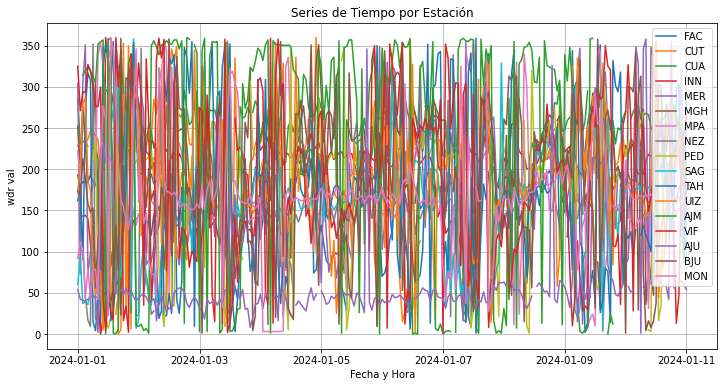

In [100]:
#data_wdr #pd.DataFrame.from_dict(data, orient='index')
data_wdr.index = pd.to_datetime(data_wdr.index)

# Graficar todas las columnas del DataFrame
plt.figure(figsize=(12, 6))
for column in data_wdr.columns:
    plt.plot(data_wdr.index, data_wdr[column], label=column)

plt.title('Series de Tiempo por Estación')
plt.xlabel('Fecha y Hora')
plt.ylabel('wdr val')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### Valores WRF

In [101]:
hours = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days * 24

# Obtener datos de velocidad y dirección del viento de WRF
field = 'WIND'
wsp_average, wdr_average = average_meteo(start_date, hours, field)
wsp_average.name = 'Wind Speed'
wdr_average.name = 'Wind Direction'

# Shift -7 horas (de UTC a CDMX meno1 hora por promedio de la hora pasada)
wsp_average.index = wsp_average.index - pd.Timedelta(hours=7)
wdr_average.index = wdr_average.index - pd.Timedelta(hours=7)


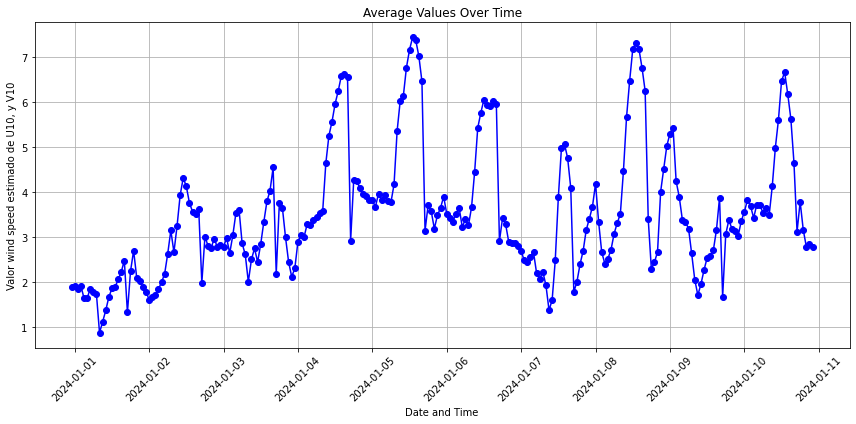

In [102]:
# wind speed plot
plt.figure(figsize=(12, 6))
plt.plot(wsp_average.index, wsp_average.values, marker='o', linestyle='-', color='b')

# títulos y etiquetas
plt.title('Average Values Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Valor wind speed estimado de U10, y V10')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


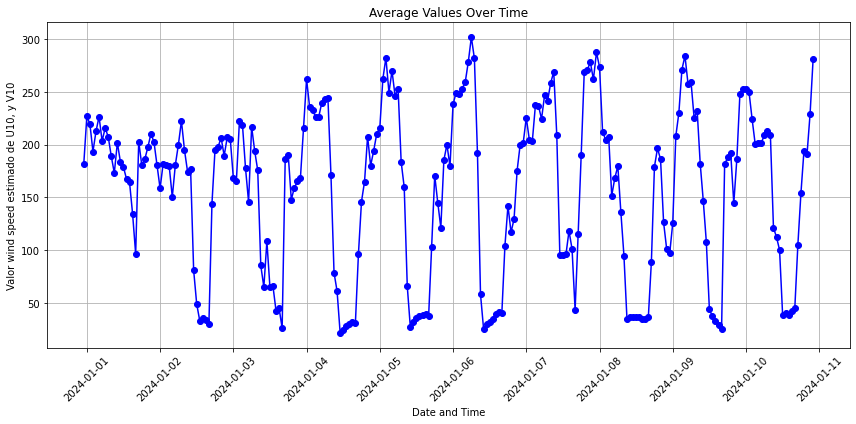

In [103]:
# wind direction plot
plt.figure(figsize=(12, 6))
plt.plot(wdr_average.index, wdr_average.values, marker='o', linestyle='-', color='b')

# títulos y etiquetas
plt.title('Average Values Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Valor wind speed estimado de U10, y V10')

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Wind Speed

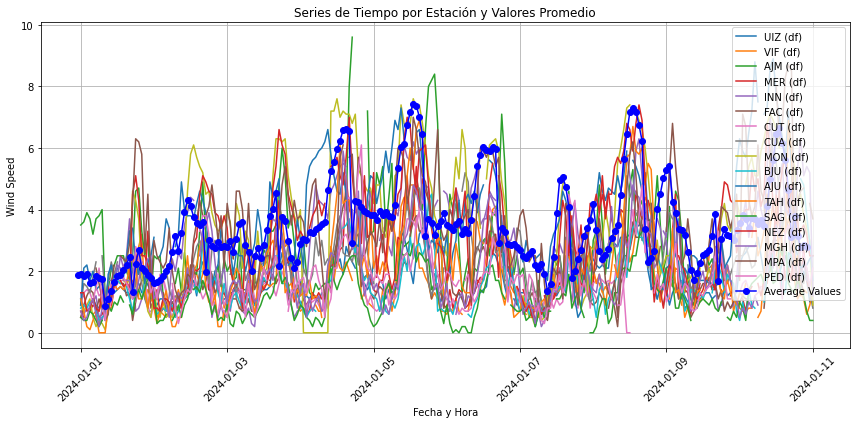

In [104]:
plt.figure(figsize=(12, 6))

# Graficar las columnas de data 
for column in data_wsp.columns:
    plt.plot(data_wsp.index, data_wsp[column], label=f'{column} (df)')

# Graficar la Series average_values
plt.plot(wsp_average.index, wsp_average.values, label='Average Values', linestyle='-', color='b', marker='o')

# Añadir títulos y etiquetas
plt.title('Series de Tiempo por Estación y Valores Promedio')
plt.xlabel('Fecha y Hora')
plt.ylabel('Wind Speed')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


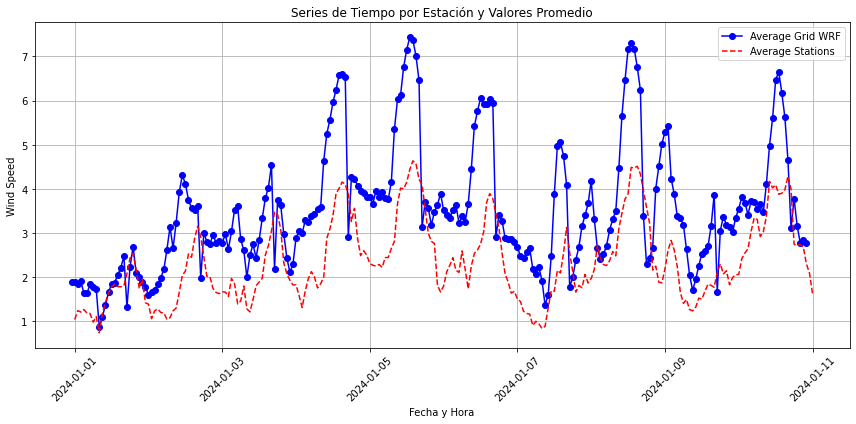

In [107]:
# Comparación de promedios de estaciones vs promdeio grid WRF
data_wsp_average = data_wsp.mean(axis=1) #promediando las estaciones

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar la serie average_values
plt.plot(wsp_average.index, wsp_average.values, label='Average Grid WRF', linestyle='-', color='b', marker='o')

# Graficar la serie 
plt.plot(data_wsp_average.index, data_wsp_average.values, label='Average Stations', linestyle='--', color='r')

# Añadir títulos y etiquetas
plt.title('Series de Tiempo por Estación y Valores Promedio')
plt.xlabel('Fecha y Hora')
plt.ylabel('Wind Speed')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Wind dir

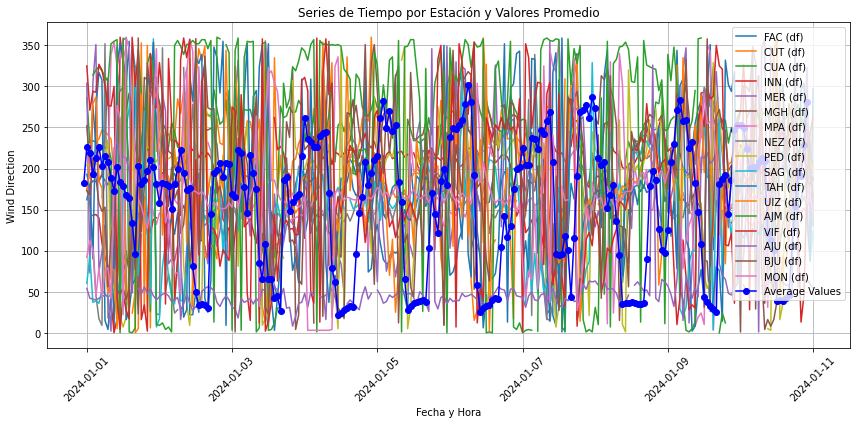

In [108]:
plt.figure(figsize=(12, 6))

# Graficar las columnas de data_wdr
for column in data_wdr.columns:
    plt.plot(data_wdr.index, data_wdr[column], label=f'{column} (df)')

# Graficar la Series wdr_average
plt.plot(wdr_average.index, wdr_average.values, label='Average Values', linestyle='-', color='b', marker='o')

# Añadir títulos y etiquetas
plt.title('Series de Tiempo por Estación y Valores Promedio')
plt.xlabel('Fecha y Hora')
plt.ylabel('Wind Direction')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



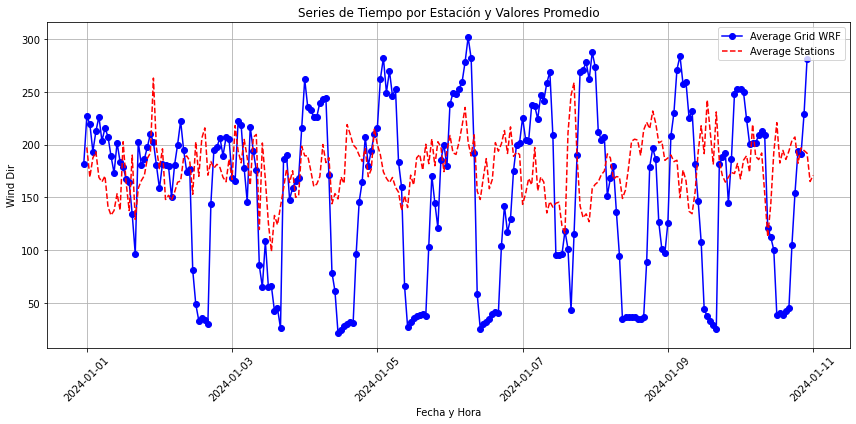

In [109]:
# Comparación de promedios de estaciones vs promdeio grid WRF
data_wdr_average = data_wdr.mean(axis=1) #promediando las estaciones

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar la serie average_values
plt.plot(wdr_average.index, wdr_average.values, label='Average Grid WRF', linestyle='-', color='b', marker='o')

# Graficar la serie 
plt.plot(data_wdr_average.index, data_wdr_average.values, label='Average Stations', linestyle='--', color='r')

# Añadir títulos y etiquetas
plt.title('Series de Tiempo por Estación y Valores Promedio')
plt.xlabel('Fecha y Hora')
plt.ylabel('Wind Dir')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comparando valores normalizados

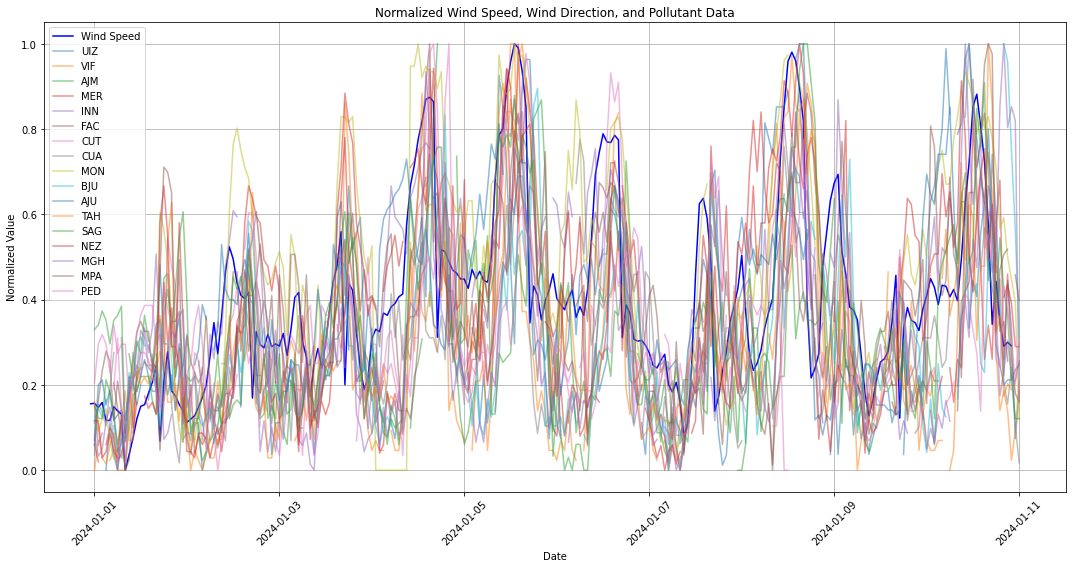

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from data_generator import average_meteo, pollutant_by_stations

# Función para normalizar los datos
def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())

# Ejemplo de uso
start_date = "2024-01-01 00:00"
end_date = "2024-01-11 00:00"
hours = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days * 24

# Obtener datos de velocidad y dirección del viento
field = 'WIND'
wsp_average, wdr_average = average_meteo(start_date, hours, field)
wsp_average.name = 'Wind Speed'
wdr_average.name = 'Wind Direction'

# Shift -1 hora
wsp_average.index = wsp_average.index - pd.Timedelta(hours=7)
wdr_average.index = wdr_average.index - pd.Timedelta(hours=7)

# Obtener datos de otros contaminantes
all_stations = ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]
pollutant = 'met_wsp'
pollutant_data = pollutant_by_stations(start_date, end_date, all_stations, pollutant)

# Crear un DataFrame combinado
combined_df = pd.DataFrame()
combined_df = pd.concat([combined_df, wsp_average, wdr_average], axis=1)
combined_df = pd.concat([combined_df, pollutant_data], axis=1)

# Normalizar los datos
combined_df = normalize_data(combined_df)

# Graficar los datos
plt.figure(figsize=(15, 8))

# Graficar velocidad del viento
plt.plot(combined_df.index, combined_df['Wind Speed'], label='Wind Speed', linestyle='-', color='b')

# Graficar dirección del viento
#plt.plot(combined_df.index, combined_df['Wind Direction'], label='Wind Direction', linestyle='--', color='r')

# Graficar otros contaminantes
for column in pollutant_data.columns:
    plt.plot(combined_df.index, combined_df[column], label=column, linestyle='-', alpha=0.5)

plt.title('Normalized Wind Speed, Wind Direction, and Pollutant Data')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


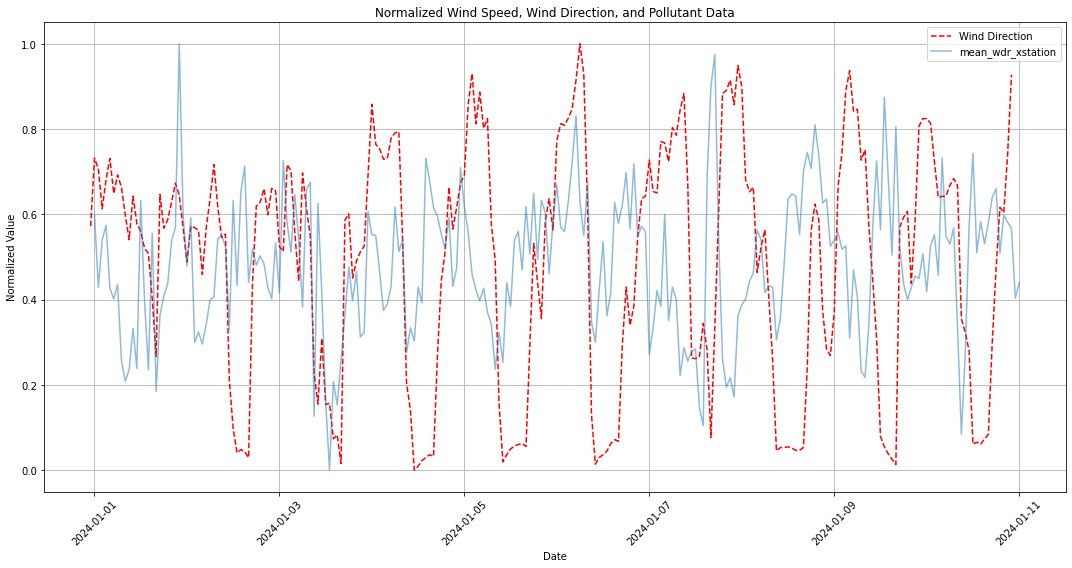

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from data_generator import average_meteo, pollutant_by_stations

# Función para normalizar los datos
def normalize_data(df):
    return (df - df.min()) / (df.max() - df.min())

hours = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days * 24

# Obtener datos de velocidad y dirección del viento
field = 'WIND'
wsp_average, wdr_average = average_meteo(start_date, hours, field)
#wsp_average.name = 'Wind Speed'
wdr_average.name = 'Wind Direction'

# Shift -1 hora
#wsp_average.index = wsp_average.index - pd.Timedelta(hours=7)
wdr_average.index = wdr_average.index - pd.Timedelta(hours=7)

# Obtener datos de otros contaminantes
all_stations = ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]
pollutant = 'met_wdr'
pollutant_data = pollutant_by_stations(start_date, end_date, all_stations, pollutant)

pollutant_data = pollutant_data.mean(axis=1)
# Convertir la Serie resultante en un DataFrame
pollutant_data = pollutant_data.to_frame(name='mean_wdr_xstation')

# Crear un DataFrame combinado
combined_df = pd.DataFrame()
combined_df = pd.concat([combined_df, wdr_average], axis=1)
combined_df = pd.concat([combined_df, pollutant_data], axis=1)

# Normalizar los datos
combined_df = normalize_data(combined_df)

# Graficar los datos
plt.figure(figsize=(15, 8))

# Graficar velocidad del viento
#plt.plot(combined_df.index, combined_df['Wind Speed'], label='Wind Speed', linestyle='-', color='b')

# Graficar dirección del viento
plt.plot(combined_df.index, combined_df['Wind Direction'], label='Wind Direction', linestyle='--', color='r')

# Graficar otros contaminantes
for column in pollutant_data.columns:
    plt.plot(combined_df.index, combined_df[column], label=column, linestyle='-', alpha=0.5)

plt.title('Normalized Wind Speed, Wind Direction, and Pollutant Data')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Widget para Graficar por estación, fecha y contaminantes


In [113]:
# %% Estaciones con datos de diferentes contaminantes
all_stations = ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]

union_keys = ['AJM', 'HGM','GAM', 'BJU','MPA','AJU', 'SFE', 'CCA', 'LPR', 'MGH', 'XAL', 'LLA', 'UAX', 'MON', 'INN', 'VIF', 'ATI', 'CUA', 'CUT', 'TAH', 'IZT', 'FAC', 'TLI']

ok_stations = list(set(all_stations) - set(union_keys))

print(ok_stations)
# otres, pmdiez, pmdoscinco, nox

['SAG', 'MER', 'PED', 'CAM', 'TLA', 'UIZ', 'NEZ']


### Contaminantes

In [116]:
# Default todos contaminantesn en todas las estaciones
from img_generator import plot_by_station_date_and_pollutant

# Definir las estaciones disponibles
ok_stations =  ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]
#['UAX', 'MER', 'XAL', 'PED']

# Crear y mostrar el widget
plot_by_station_date_and_pollutant(start_date="2024-05-09 00:00", end_date="2024-05-19 00:00", ok_stations=ok_stations)


## Widget para Graficar  estación, contaminantes y variable meteorológicas WRF (normalizados)

In [117]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [120]:
# Importar el módulo
from img_generator import plot_by_station_date_and_meteo_pollutant

# %% Estaciones con datos de diferentes contaminantes
all_stations = ["UIZ","AJU" ,"ATI" ,"CUA" ,"SFE" ,"SAG" ,"CUT" ,"PED" ,"TAH" ,"GAM" ,"IZT" ,"CCA" ,"HGM" ,"LPR" ,
                "MGH" ,"CAM" ,"FAC" ,"TLA" ,"MER" ,"XAL" ,"LLA" ,"TLI" ,"UAX" ,"BJU" ,"MPA" ,
                "MON" ,"NEZ" ,"INN" ,"AJM" ,"VIF"]
# Definir las estaciones disponibles
ok_stations = ['UAX', 'MER', 'XAL', 'PED']

# Crear y mostrar el widget
plot_by_station_date_and_meteo_pollutant(start_date="2024-01-01 00:00", end_date="2024-01-11 00:00", ok_stations=all_stations)


## Widget para Graficar  estación, contaminantes y variable meteorológicas WRF (valores no normalizados)

In [125]:
# Importar el módulo
from img_generator import plot_by_station_date_and_meteo_pollutant_unnormalized

# Definir las estaciones disponibles
ok_stations = ['UAX', 'MER', 'XAL', 'PED']

# Crear y mostrar el widget
plot_by_station_date_and_meteo_pollutant_unnormalized(start_date="2024-01-01 00:00", end_date="2024-01-11 00:00", ok_stations=ok_stations, y_min=0, y_max=280)
